In [5]:
def hide():

    return HTML('''<script>
            code_show=true; 
            function code_toggle() {
             if (code_show){
             $('div.input').hide();
             } else {
             $('div.input').show();
             }
             code_show = !code_show
            } 
            $( document ).ready(code_toggle);
            </script>
            <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

hide()

EXPLAINABILITY THROUGH FEATURE IMPORTANCE
=======

In [6]:
import matplotlib.image as mpimg
from matplotlib import rcParams
hide()

In [7]:
import numpy as np
import pandas as pd
import random
import sys
from PIL import Image
import matplotlib.image as mpimg
from skimage import color
from skimage import io
import matplotlib.pyplot as plt
from IPython.display import HTML
hide()

##  Background 

With advent of machine learning and industries adapting to these models, there has been growing need to open the black box models and pursue realm of explainable AI.This has become key aspect in productionalising ML pipelines for end business users to have interpretable outcomes. Feature Importance is one of these methods which gives us access to mathematical measure like "scores" explaining importance of each variable of data in predicting an outcome. This has helped modelers develop "good machine learning models" rather than just complex models and answers to why than just what. 

With available explainibility, people are now utilising feature importance many other applications e.g. feature Selection, Sensitivity Analysis, Drivers and Barriers analysis etc. 

In one of my office projects, I was able to reduce variables from 1600 to ~120 by this method and was able to deep dive into top 10 variables and proposed how changing few variables of those can improve sales revenue for drug company.

<h2> Objective </h2>

The goal of this notebook is to explore various methods available to increase any machine learning model's explainibility which is Feature Importance.The report will go through what feature importance means , techniques used in industry and academic,its comparison and briefly touches upon feature selection.It will give understanding of how these algorithms work and its implementation on Python.We will see many visualizations as it's most importances aspect of showcasing feature importance. We will parallely cover its applications and later we will touch upon possible pitfalls in available methods and future scope of improvements.


Dataset used : Scikit.datasets , Boston data for house pricing.

<br>
For curious souls, there is a last section for further reads !!!

<h3> Index </h3>

1.  [Introduction to Feature Importance](#SQL)  </br>

3.  [Feature Importances Methods](#cs) </br>
<br>
2.  [Measures of Feature Importance](#Joins) </br>
<br>
4.  [Deep Dive Model Agnostic Techniques](#Python) </br>

5.  [Model Specific Method](#tables) </br>

6.  [Automatic Featurse Selection by RFE](#examples2)</br>

7.  [Algo Comparison of all models with top k features](#example3)</br>

8.  [Variance for importances](#elbow)</br>

9.  [Empirical p-values for importances](#imgcomp)</br>

10. [Future Scope](#ex_otm_mtm)</br>

11. [Jupyter Notebook](#Notebook_Link)</br>

12. [Conclusion](#conclusion)</br>

13. [Readings](#practice_Link)</br>


<a id="SQL"></a>
<h1> Introduction to Feature Importance 

<h2> What is Feature Importance in a model?

We went through general idea of feature importance but how is it interpreted in model is a different story. It is a mathematical measure "scores" assigned to each of the variables used in model for prediction.These "score" can be interpreted as importance of that feature. Generally , these are relative importances as its value mayn't have substanial meaning.So, a higher score generally means that it had more weightage in predicting outcome. it can be thought as rank. There are developments to measure exact magnitude(share) of importance e.g shapley which we will cover later. 

<h2> Why is Feature Importance in a model?

Imagine you are asked to predict employee churn in next year and present to HR of your company. Do you think that just showing them numbers will be enough? What do you think will be the next questions? What data was used ? Was it relevant? What are causing these churns and what came out as top influencers in driving churn or preventing the same.

Feature Importance comes to the rescue as it explains what all went in our model, how were the features selected and correlated and how it improved the model. It expands to which of these features had most predictive power. 

<h2> Trade Off between Complexity and Explainibility

Often complexer models tend to have lower explainility due to its complex mathematics and computation behind. So, often people tend to prefer simpler approaches to avoid non interpretability. This has been resolved by upcoming solutions like SHAP and LIME which makes utlising complex models easier for business use.

In [131]:
from PIL import Image
im = Image.open('/Users/surbhiprasad/Desktop/tradeoff.png')
im = im.resize((650,300),Image.ANTIALIAS)
hide()

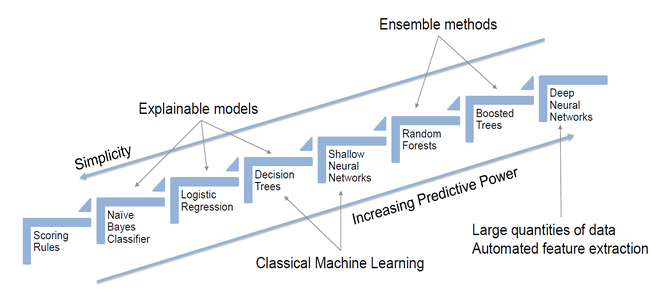

In [132]:
im

Credits: https://optinum.co.za/explainability-for-machine-learning-models-in-matlab/

<a id="cs"></a>
<h1> Feature Importance Methods


- <b> Model Agnostic Methods </b> - which can be applied to any model like Spearman Correlation, PDP, PCA, Chisquared, Mutual information, LIME or shapley etc.

- <b> Model Specific Methods </b>- which can be applied to specific model like Linear regression coefficients, Random Forest Gini/variance based importances or LGBM split based importance.


These can also be demarcated based on Univariate (individual variable importance without influence of other variables) and Multivraiate methods  (importance with other variables taken in consideration).

Both are important depending on purpose and generally used together.

In [19]:
from PIL import Image
im = Image.open('/Users/surbhiprasad/Desktop/Methods.png')
im = im.resize((600,300),Image.ANTIALIAS)
hide()

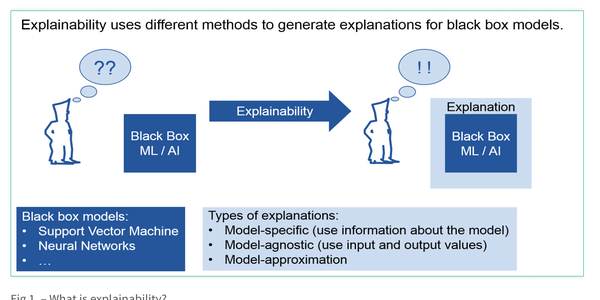

In [20]:
im

Credits: https://project.dke.maastrichtuniversity.nl/studentprojects/?p=279

<a id="Joins"></a>
<h1> Deep Dive Techniques and Algorithms

<b><h3> 1. Spearman Correlation Coefficient </b></h3>

 It determines the strength and  direction of  monotonic relationship between any tqo variables. hence, it's able to identify relation between one feature at a time and target variable. The method is based on simple statistical covariance formula and easy to understand. 
 
 Spearman’s Correlation is based on the rank of variables ranging from ( -1,1 ) with mathematical formula as:
 Higher positive value is higher positive correlation between target and feature. Similarly, high negative value shows stong negative correlation.
    

In [99]:
from PIL import Image
im = Image.open('/Users/surbhiprasad/Desktop/spearman.png')
im = im.resize((450,200),Image.ANTIALIAS)
hide()

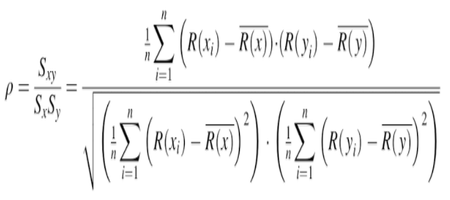

In [100]:
im

Where:
R(x) and R(y) are the ranks of variables x and y,
R(x)bar and R(y)bar are the mean ranks.

The Code is simple to implementation of this formula:

```python
def Spearman_correl(x,y):

    x=np.array(x)
    y=np.array(y)
    x=np.array(pd.Series(x).rank())
    y=np.array(pd.Series(y).rank())
    xu=np.mean(x)
    yu=np.mean(y)
    Num= np.sum((x-xu)*(y-yu))
    Den= np.sqrt(np.sum((x-xu)**2)*np.sum((y-yu)**2))
    corr=Num/Den
      
    return "{:.6f}".format(corr)
```

The results can be seen easy as heatmap below:

In [95]:
from PIL import Image
im = Image.open('/Users/surbhiprasad/Desktop/correl.png')
im = im.resize((600,400),Image.ANTIALIAS)
hide()

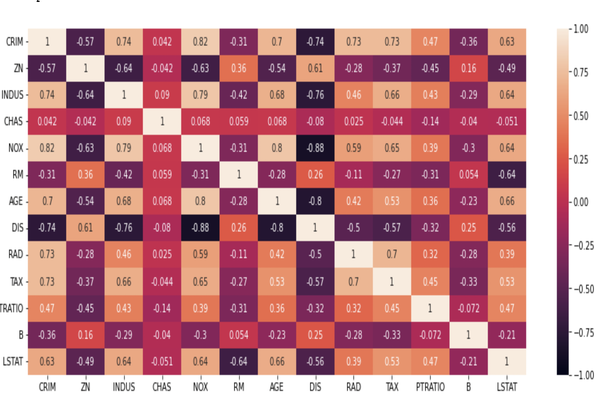

In [96]:
im

It is good for capturing independent features impact and simple to comprehend  but can not be good for models with codependent features. It also doesn't tell more about collinear features for feature selection

<b><h3> 2. Principal Component Analysis </b></h3>

PCA constructs relevant features/variables through linear (linear PCA) or non-linear (kernel PCA) combinations of the original variables (features).It linearly transforms correlated variables into reducedof uncorrelated variables. This is done by projecting (dot product) the original data into the reduced PCA space using the eigenvectors of the covariance matrix. Larger absolute values means more specific feature contribution.

```python 
def basic_PCA(X,k):
    cols=X.columns
    Xu=X - np.mean(X)
    total_var = []
    covmtrx = np.cov(Xu , rowvar = False)
    evalues , evectors = np.linalg.eigh(covmtrx)
    sort_idx = np.argsort(evalues)[::-1] 
    eval_sort = evalues[sort_idx]
    evec_sort = evectors[:,sort_idx]
    total_var= [(cols[i],evalues[i] / np.sum(evalues)) for i in range(len(evalues))]
    ncomps = k
    changed_evec = evec_sort[:,0:ncomps]
    Xred = np.dot(changed_evec.transpose(),Xu.transpose()).transpose()
    return Xred,sorted(total_var, key=lambda x: x[1],reverse=True)
```

In [48]:
from PIL import Image
im = Image.open('/Users/surbhiprasad/Desktop/PCA.png')
im = im.resize((500,300),Image.ANTIALIAS)
hide()

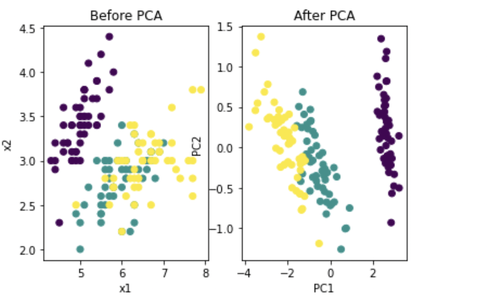

In [49]:
im

We can see how three variables are clubbed into two by moving vectors closer for collinear variables. Petal width and Length comes out as important (together explain ~95%).

 ```python 
  ('petal width', 0.9246162071742683),
  ('petal length', 0.05301556785053489),
  ('sepal width', 0.017185139525006877),
  ('sepal length', 0.005183085450189981)
```

<b><h3> 3. mRMR </b></h3>

In [ ]:
It's primarly useful where multicolinearity exists between the features.

This concept is based on Minimum Redundancy Maximum Relevance feature selection selects features showing low correlations among the other features (Minimum Redundancy) and at the same time have high correlation to the target variable (Maximum Relevance).
So, it serves purpose of both finding feature importance by generated scores and selection.

In [58]:
from PIL import Image
im = Image.open('/Users/surbhiprasad/Desktop/mRMR_other.png')
im = im.resize((300,100),Image.ANTIALIAS)
hide()

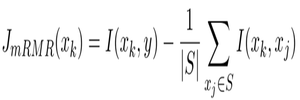

In [55]:
im

In [56]:
from PIL import Image
im = Image.open('/Users/surbhiprasad/Desktop/mRMR.png')
im = im.resize((500,300),Image.ANTIALIAS)
hide()

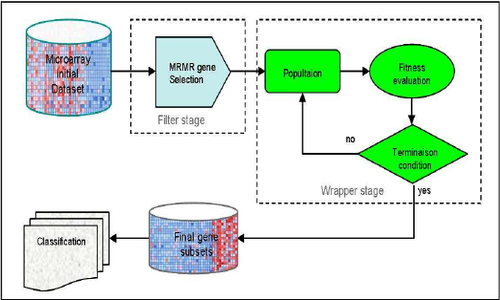

In [57]:
im

Credits:Gene Paper

With MRMR, if two features are similar, only the more relevant one will be considered important but it only works for supervised datasets.

Boston Data , subset_num=6:
- Total Features: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
- Selected Features by mRMR: ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'CRIM']

<a id="Python"></a>
<h1> Model Specific Method

In [ ]:
print(mrmr(X,y,6))

<b><h3> 1. Gini and Split based Importances </b></h3>

- Ginity Importance is the sum of the impurity improvement of the nodes using the feature. (RF)
- Split Importance counts number of times nodes split on specific feature cosidering importance is connected to number of times feature is split. (LGBM)

<b> RF Importances </b>

In [117]:
from PIL import Image
im = Image.open('/Users/surbhiprasad/Desktop/rfr.png')
im = im.resize((500,250),Image.ANTIALIAS)
hide()

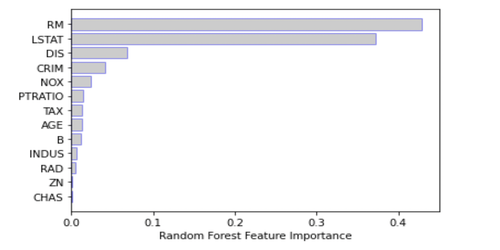

In [118]:
im

As we can see, the relative importances it shows and maginitude has no meaning. We can see top variables as RM and LSTAT.
This method is fast giving result during fit only. No extra computation is needed. Drawaback is its tendency to choose numerical and categorical features of high cardinality.Also, for collinear features , it may give very high importance to one but very small to other correlated feature.

<b><h3> 2. Drop Column importance </b></h3>

It is a model agnostic measure which says that if model performance doesn't degrade much even on removing not so important features. So it basically refits and computes metric to compare with acceptable threshold change in metric to choose top n features.

• Algorithm:
1. Compute validation metric for model trained on all features
2. Drop column 𝑥 from training set
3. Retrain model
4. Compute validation metric set
5. Importance score is the change in metric

.. if 5 is less than threshold, repeat from 2 otherwise return remaining features.

Actual Importance is measure as loss in model performance.

```python
def dropcol_importances(model,metric,X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train)
    baseline = metric(y_valid, model.predict(X_valid))
    imp = []
    X_train=pd.DataFrame(X_train)
    X_valid=pd.DataFrame(X_valid)
    for col in X_train.columns:
        X_train_ = X_train.drop(col, axis=1)
        X_valid_ = X_valid.drop(col, axis=1)
        model_ = clone(model)
        model_.fit(X_train_, y_train)
        m = metric(y_valid, model_.predict(X_valid_))
        imp.append((col,baseline - m))
    return imp
```

• It's expensive because it refits model every time for n features


• Codependent features often result in 0 or very low importance

<b><h3> 2. Permutation Importance </b></h3>

In algorithm, we will randomly shuffle specific feature and compute change in the model performance. Those features impacting performance the most come out as important.

Algorithm:
1. Compute validation metric for model trained on all features
2. Permute column 𝑥! in validation set
3. Compute validation metric set
4. Importance score is the change in metric

Permutation based importance is computationally expensive but better than drop. Retraining not needed so much more efficient than drop column importance but can create nonsensical records through permutation.
It also causes collinear features to share importances.

Comparison

In [115]:
from PIL import Image
im = Image.open('/Users/surbhiprasad/Desktop/img1.png')
im = im.resize((450,350),Image.ANTIALIAS)
im2 = Image.open('/Users/surbhiprasad/Desktop/img2.png')
im2 = im2.resize((450,350),Image.ANTIALIAS)
hide()

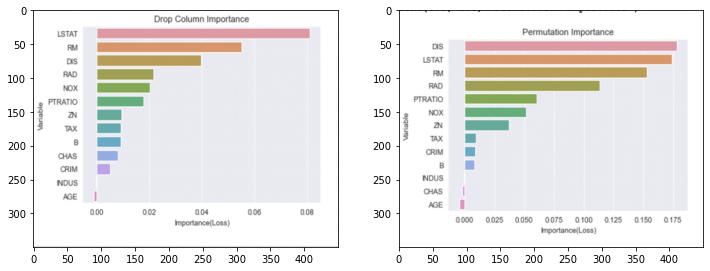

In [116]:
rcParams['figure.figsize'] = 12 ,8
fig, ax = plt.subplots(1,2)
ax[0].imshow(im)
ax[1].imshow(im2)

As we can see in 1st chart above (Drop Importance), CRIM has gone down to almost 0 which was 4th in RF. seems to be collinear feature. Similarly, in permutation importance chart(2nd above) , CRIm's share is less compared to RF, means it's sharing its importance with other collinear feature. Otherwise top 3 ones look same in all importances so far.

<b><h3> 3. Shapley </b></h3>

Shapley Additive Explanation (Shap) is operates on the single prediction level . The algorithm derives its name from the ‘Shapley values’ — a concept that is commonly used within the field of cooperative game theory to determine the payout for each player within a cooperative coalition.

In [105]:
from PIL import Image
im = Image.open('/Users/surbhiprasad/Desktop/shap.png')
im = im.resize((500,200),Image.ANTIALIAS)

hide()

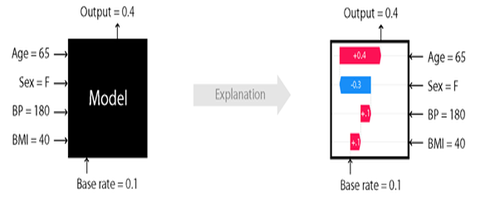

In [106]:
im

Image source : SHAP Github

As mentioned above, SHAP algorithm's final prediction can be calculated by adding a baseline value — which is constant for each machine learning model to the sum of all Shapley value

In [109]:
from PIL import Image
im = Image.open('/Users/surbhiprasad/Desktop/shapley.png')
im = im.resize((500,350),Image.ANTIALIAS)

hide()

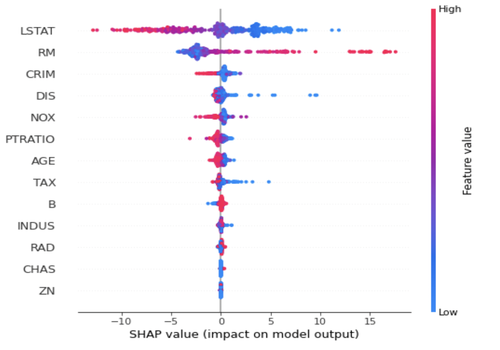

In [110]:
im

As we can top features are still same, with LSTAT having maximum impact. Based on magnitude we can guess all variables after DIS isin't contributing much which we can test in our next section of automatic feature selection based on recursive elimination method.

SHAP is the most widely used as granular and because of its results in both local and global explanations .One of the key disadvantages while using the SHAP algorithm is its computational time which can be taken care of by running on subset of data.

<a id="tables"></a>
<h1> Automatic Featurse Selection by RFE

Algorithm:




* <b> Step 1 </b>- Get a baseline validation metric appropriate for a classifier or a regressor.

* <b> Step 2 </b>- Then get the feature importances.

* <b> Step 3 </b>- Drop the lowest importance feature and retrain the model and re-computing the validation metric.

* <b> Step 4 </b>- Because of codependencies between features, we must recompute the feature importances after dropping each feature.

* <b> Step 5 </b>- If the validation metric is worse, then we have dropped one too many features.Hence, break out of loop.


```python
def automatic_feature_select(model,metric,method_imp,X_train, y_train, X_valid, y_valid):
    columns_dataframe=pd.DataFrame(X_train).columns
    model.fit(X_train, y_train)
    baseline = metric(y_valid, model.predict(X_valid))
    scoring = 'neg_mean_absolute_percentage_error'
    if method_imp=='permutation':
        r_multi = permutation_importance(model, X_valid, y_valid, n_repeats=30, random_state=0, scoring=scoring)['importances_mean']  
    r_multi=np.vstack((np.arange(X_train.shape[1]), r_multi)).T
    r_multisort=r_multi.copy()
    r_multisort=r_multi[r_multi[:, 1].argsort()]
    rem_X_train=X_train.copy()
    rem_X_valid=X_valid.copy()
    dropped_indexes=[]
    for k in range(0,len(columns_dataframe)):
        rem_X_train=np.delete(rem_X_train,0 , 1)
        rem_X_valid=np.delete(rem_X_valid, 0, 1)
        model.fit(rem_X_train, y_train)
        new_val_metric = metric(y_valid, model.predict(rem_X_valid))
        if (abs(baseline-new_val_metric)*1.00/baseline)>0.05:
            break
        else:
            dropped_indexes.append(r_multisort[0][0])
            r_multi=np.delete(r_multi,np.where(r_multi[:,0]==r_multisort[0][0]),0)
            if method_imp=='permutation':
                r_multi_new= permutation_importance(model, rem_X_valid, y_valid, n_repeats=30, random_state=0, scoring=scoring)['importances_mean']
                r_multi_new=np.vstack((r_multi[:,0], r_multi_new)).T
            r_multisort=r_multi_new.copy()
            r_multisort=r_multisort[r_multisort[:, 1].argsort()]
    return r_multisort,dropped_indexes

```
        

In [141]:
from PIL import Image
im = Image.open('/Users/surbhiprasad/Desktop/dropvars.png')
im = im.resize((600,300),Image.ANTIALIAS)

hide()

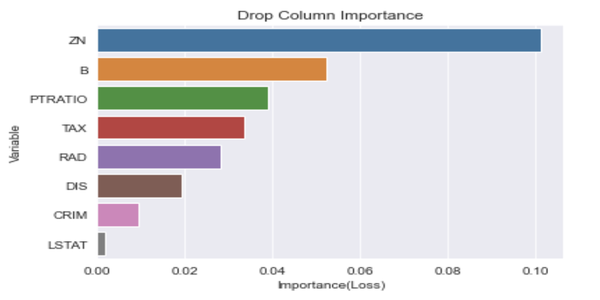

In [142]:
im

We can see 8 features are selected by RFE method.

<a id="example2"></a>
<h2> Comparison of all models with top k features

In [147]:
from PIL import Image
im = Image.open('/Users/surbhiprasad/Desktop/compar.png')
im = im.resize((600,300),Image.ANTIALIAS)

hide()

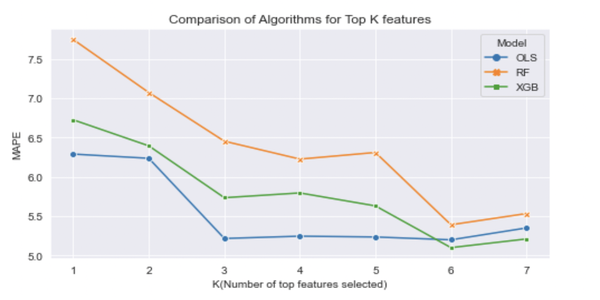

In [148]:
im

We can see how loss trend decreasing with inclusion of features and OLS having least MAPE till 6 features when XGBoost starts performing better from 6 onwards.

<h1> Variance and empirical p-values for importances

Giving single value for feature mayn't be meaningful without mentioning its condifence interval and p-value which shows hwther that feature is significant or not.P-values are calculated based on method of Null importances with 200 iterations and 5% threshols. Count of times new feature importance is more than baseline decided whether feature is significant or not.  

```python
def var_fi(data, times):
    varimps=[]
    for i in range(0,times):
        print(i)
        bootsp_data_X=pd.DataFrame(np.hstack((data.data,data.target.reshape(-1,1)))).sample(frac=0.5, replace=False)
        X_train, X_val, y_train, y_val = train_test_split(bootsp_data_X.iloc[:,:-1], bootsp_data_X.iloc[:,-1])
        imp=pd.DataFrame(permutation_importances(model, rsquared,X_val, y_val),columns=['Variable','Importance'])
        #dropcol_importances(model, rsquared,X_train, y_train,X_val, y_val)
        sc = MinMaxScaler(feature_range=(0, 1))
        data_norm = sc.fit_transform(np.array(imp)[:,1].reshape(-1,1))
        imp=np.hstack((np.array(imp)[:,0].reshape(-1,1),data_norm))
        varimps.append(imp)
    cols=bootsp_data_X.shape[1]-1 
    var_df=pd.DataFrame(np.array(varimps).reshape(cols*times,2))
    var_df.columns=['col','val_vi']
    result = var_df.groupby(['col'], as_index=False).agg({'val_vi':['mean','std','count']})
    result['relative_mean']=(result['val_vi']['mean']*1.00)/sum(result['val_vi']['mean'])
    result['max_CI']=(result['relative_mean']+(2*result['val_vi']['std']/np.sqrt(result['val_vi']['count'])))/2
    result['min_CI']=(result['relative_mean']-(2*result['val_vi']['std']/np.sqrt(result['val_vi']['count'])))/2
    return var_df,result
```

In [127]:
from PIL import Image
im = Image.open('/Users/surbhiprasad/Desktop/var.png')
im = im.resize((600,300),Image.ANTIALIAS)

hide()

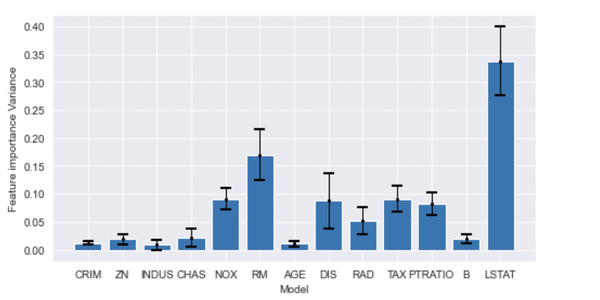

In [128]:
im

<h2> p-value by null importances

P-values are calculated based on method of Null importances with 200 iterations and 5% threshols. Count of times new feature importance is more than baseline decided whether feature is significant or not.  

In [149]:
from PIL import Image
im = Image.open('/Users/surbhiprasad/Desktop/good.png')
im = im.resize((600,300),Image.ANTIALIAS)

hide()

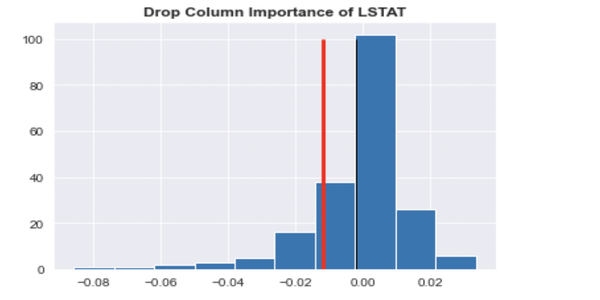

In [150]:
im

In [151]:
from PIL import Image
im = Image.open('/Users/surbhiprasad/Desktop/bad.png')
im = im.resize((600,300),Image.ANTIALIAS)

hide()

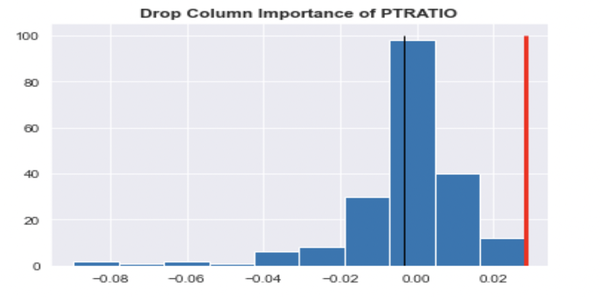

In [152]:
im

<a id="ex_otm_mtm"></a> 
<h2> Future Scope  </h2>


* We can exlpore how to make our algorithms fast and robust to edge cases

* We can further deep dive in compariosn of importances methods and find out scenarios when to use which.

* There is also scope to understanf feature selection process and its robustness across methods.


<a id="Notebook_Link"></a> 
<h2> Jupyter Notebook  </h2>



For more info and examples using concrete data, please see our [Notebook](https://github.com/USF-MSDS689/featimp-surbhi33/blob/master/featimp_backgnd.ipynb).

<a id="conclusion"></a> 
<h2> Summary </h2>

We covered the goal of this project starting with what is feature importance. Then we got to see why is it so important in explaining black box machine learning models and its relevance to industires. We further deep dived into feature importance types and algorithms , We saw how different algorithms may find out different features as important. We covered shapley, spearman, pca, RF based, mRMR etx methods.Then we say how to select top k Features by Recuresive feature Elimination method. Later , we saw that it's important to provide feature importance with variance and p-values to show whether it is significant by runnning null importances multiple iterations.

Hence, e concluded with that there  is scope for further covering LIME ad other methods and also find robust top K featurees.



<a id="practice_Link"></a>    
<h2> Reading Material  </h2>


A. Feauture Importance: [Intro](https://www.youtube.com/watch?v=73SEn4TaCxs)

B. Feature Selection Methods: [Feature Selection methods](https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2)

C. Feature Importance Comparison: [Feature Importance Comparison](https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285#:~:text=Feature%20Importance%20refers%20to%20techniques,to%20predict%20a%20certain%20variable)

D. Shapley: [SHAP](https://christophm.github.io/interpretable-ml-book/shapley.html)

E. Track updates on Feature Importance [Updates](https://paperswithcode.com/task/feature-importance)